In [1]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import math
import histlite as hl

import scipy.signal as signal
import scipy.interpolate as interp
    

In [2]:
#Source list from the website is upto date.  copied to excel to save as a csv
swift_sources = np.genfromtxt('./names_2.txt', dtype = 'str', delimiter = '\n')

In [3]:
sources = pd.DataFrame(swift_sources, columns = ['name'])

In [4]:
source_names = [n.replace(' ', '') for n in sources.name]
source_names = [n.replace('+', 'p') for n in source_names]

In [5]:
name_disp = [n.replace(' ', '_') for n in sources.name]
name_disp = [n.replace('-', '_dash_') for n in name_disp]
name_disp = [n.replace('+', '_plus_') for n in name_disp]
name_disp = [n.replace('.', '_dot_') for n in name_disp]

In [6]:
sources['name_disp'] = name_disp

In [7]:
var = []
excess_var = []
mean_rate = []
ra_deg = []
dec_deg = []

for n in source_names:
    #n2 = n.replace(' ','')
    #n2 = n2.replace('+', 'p')
    x = np.load(f'full_lcs/10.0/source_params_{n}.npy', allow_pickle=True)[()]
    var.append(x['var'])
    excess_var.append(x['excess_var'])
    mean_rate.append(x['mean_rate'])
    ra_deg.append(x['ra_deg'])
    dec_deg.append(x['dec_deg'])

In [8]:
sources['var'] = var
sources['excess_var'] = excess_var
sources['mean_rate'] = mean_rate
sources['dec_deg'] = dec_deg
sources['ra_deg'] = ra_deg

In [9]:
sources

,name,name_disp,var,excess_var,mean_rate,dec_deg,ra_deg
0,IGR J00291+5934,IGR_J00291_plus_5934,2.322860,-507.697526,-0.000011,59.5720,7.2630
1,IGR J00370+6122,IGR_J00370_plus_6122,2.515555,60.818031,0.000119,61.3600,9.2900
2,XTE J0055-727,XTE_J0055_dash_727,1.634125,NaN,0.000042,-72.8270,12.2980
3,SMC X-3,SMC_X_dash_3,3.226953,NaN,0.000230,-72.4330,13.0250
4,RX J0052.1-7319,RX_J0052_dot_1_dash_7319,1.775639,30.511509,0.000158,-73.3181,13.0921
...,...,...,...,...,...,...,...
249,XB 2129+470,XB_2129_plus_470,1.653276,-290.617357,-0.000030,47.2900,322.8590
250,Ginga 2138+56,Ginga_2138_plus_56,2.439267,146.691538,0.000076,56.9860,324.8780
251,Cyg X-2,Cyg_X_dash_2,120.588222,5.771625,0.008304,38.3220,326.1720
252,4U 2206+54,4U_2206_plus_54,6.161927,4.345386,0.001014,54.5180,331.9840


[]

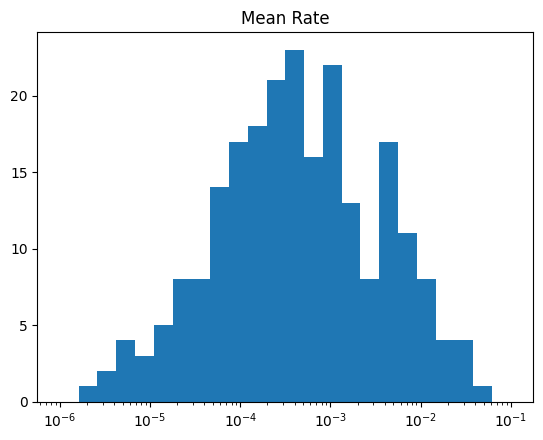

In [10]:
plt.hist(sources['mean_rate'], bins=np.logspace(-6, -1, 25));
plt.title('Mean Rate')
plt.semilogx()

(1, 223872.11385683378)

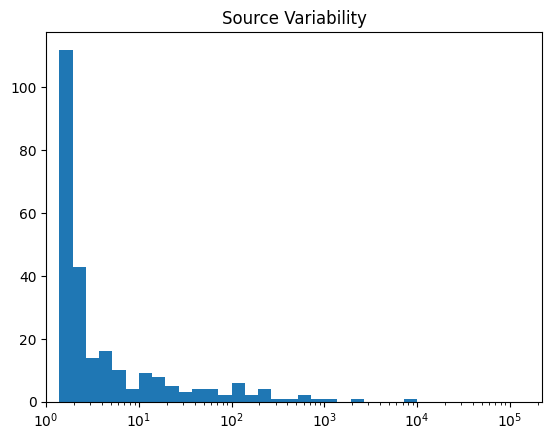

In [11]:
plt.hist(sources['var'], bins=np.logspace(-2,5,50));
plt.semilogx()
plt.title('Source Variability')
plt.xlim(1)

(1, 223872.11385683378)

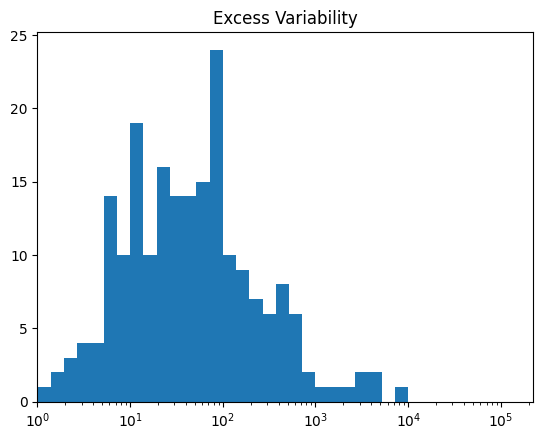

In [12]:
plt.hist(sources['excess_var'], bins=np.logspace(-2,5,50));
plt.semilogx()
plt.title('Excess Variability')
plt.xlim(1)

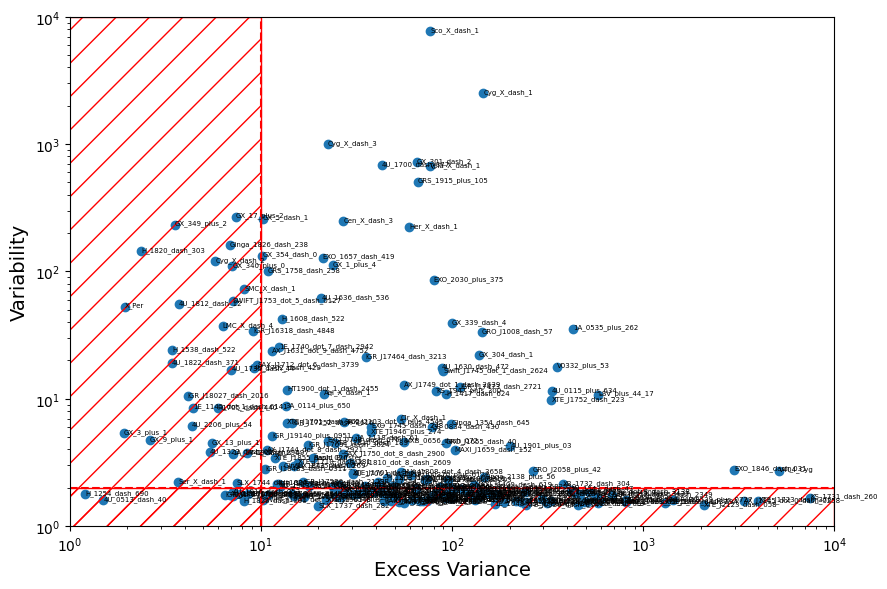

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rcParams['axes.labelsize'] = 14  # Axis labels font size
plt.rcParams['xtick.labelsize'] = 14  # X-axis tick labels font size
plt.rcParams['ytick.labelsize'] = 14 
plt.scatter(sources['excess_var'].values, sources['var'].values)
plt.loglog()

for i in sources.index:
    x = np.nan_to_num(sources['excess_var'][i], nan = 1e-3 )
    y = np.nan_to_num(sources['var'][i], nan = 1e-3)
    if (x > 1) and (y > 1): 
        plt.text(x, y, s=sources['name_disp'][i], 
             fontsize=5)
plt.xlabel('Excess Variance', fontsize=14)
plt.ylabel('Variability', fontsize = 14)
plt.axvline(10, c='r', ls = '--')
x = np.linspace(0, 10, 100)
y1 = np.full_like(x, 1e4)
y2 = np.full_like(x, 0)
ax.fill_between(x, y1, y2, hatch='/', facecolor='none', edgecolor='red')

x = np.linspace(0, 1e4, 100)

# Define y values (constant here for the desired region)
y1 = np.full_like(x, 2)
y2 = np.full_like(x, 0)

# Fill the region between y1 and y2 with a hatch pattern
ax.fill_between(x, y1, y2, hatch='/', facecolor='none', edgecolor='red')

plt.axhline(2, c='r', ls = '--')
plt.xlim(1,1e4)
plt.ylim(1,1e4)
plt.tight_layout()
plt.savefig('Source Selection.png')

In [14]:
sources[sources.name_disp == 'SAX_J0835_dot_9_plus_5118']

,name,name_disp,var,excess_var,mean_rate,dec_deg,ra_deg
29,SAX J0835.9+5118,SAX_J0835_dot_9_plus_5118,1.495978,-258.82769,-0.000042,51.31,128.983


In [15]:
print(len(sources.index))

mask = (sources['var'] > 2) & ( sources['excess_var'] > 10)

print(len(sources[mask].index))

254
91


In [16]:
sources[~mask].sort_values(by = 'var')

,name,name_disp,var,excess_var,mean_rate,dec_deg,ra_deg
139,SLX 1737-282,SLX_1737_dash_282,1.440945,19.977566,0.000488,-28.302,265.179
247,XTE J2123-058,XTE_J2123_dash_058,1.455674,2079.288731,0.000006,-5.798,320.810
34,XTE J0929-314,XTE_J0929_dash_314,1.458243,243.454063,0.000034,-31.390,142.330
44,Nova Mus 1991,Nova_Mus_1991,1.463553,-294.169430,-0.000040,-68.683,171.600
25,1A 0620-00,1A_0620_dash_00,1.477391,455.252828,0.000013,-0.350,95.675
...,...,...,...,...,...,...,...
251,Cyg X-2,Cyg_X_dash_2,120.588222,5.771625,0.008304,38.322,326.172
197,H 1820-303,H_1820_dash_303,144.738434,2.358464,0.011936,-30.361,275.919
204,Ginga 1826-238,Ginga_1826_dash_238,160.847673,6.902552,0.011530,-23.797,277.368
104,GX 349+2,GX_349_plus_2,233.701686,3.536770,0.016009,-36.423,256.435


In [17]:
sources[~mask].sort_values(by = 'excess_var', ascending=False)

,name,name_disp,var,excess_var,mean_rate,dec_deg,ra_deg
131,KS 1731-260,KS_1731_dash_260,1.672047,7479.912397,0.000002,-26.1000,263.550
122,XTE J1723-376,XTE_J1723_dash_376,1.585196,3997.716420,0.000006,-37.6500,260.900
209,AX J1845.0-0258,AX_J1845_dot_0_dash_0258,1.571028,3348.760779,0.000004,-2.9450,281.222
247,XTE J2123-058,XTE_J2123_dash_058,1.455674,2079.288731,0.000006,-5.7980,320.810
216,IGR J18539+0727,IGR_J18539_plus_0727,1.610085,1429.674945,0.000004,7.4500,283.475
...,...,...,...,...,...,...,...
218,XTE J1856+053,XTE_J1856_plus_053,1.981135,NaN,0.000127,5.3300,284.163
232,SWIFT J1922.7-1716,SWIFT_J1922_dot_7_dash_1716,2.184623,NaN,0.000286,-17.2840,290.654
236,4U 1954+31,4U_1954_plus_31,17.296001,NaN,0.002825,32.0970,298.926
239,SWIFT J2000.6+3210,SWIFT_J2000_dot_6_plus_3210,1.729729,NaN,0.000351,32.1898,300.091


(1, 10000.0)

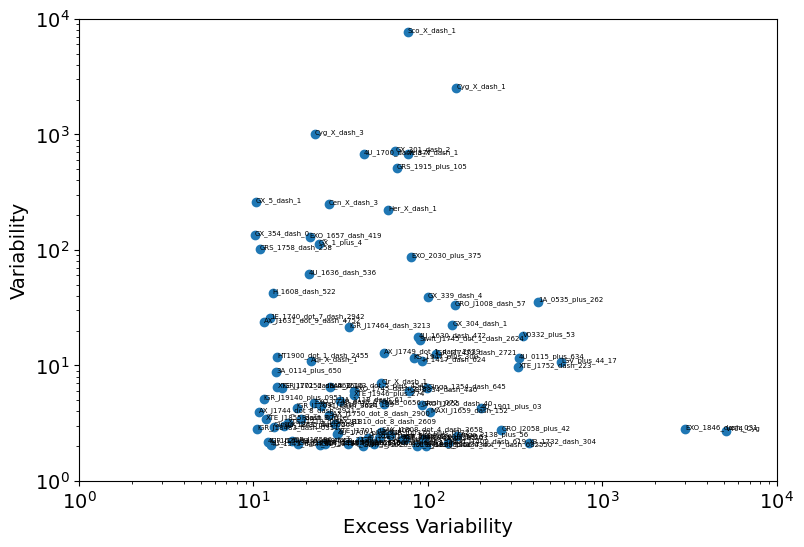

In [18]:
fig, ax = plt.subplots(figsize=(9,6))

plt.scatter(sources[mask]['excess_var'].values, sources[mask]['var'].values)
plt.loglog()

for i in sources[mask].index:
    x = np.nan_to_num(sources[mask]['excess_var'][i], nan = 1e-3 )
    y = np.nan_to_num(sources[mask]['var'][i], nan = 1e-3)
    if (x > 1) and (y > 1): 
        plt.text(x, y, s=sources[mask]['name_disp'][i], 
             fontsize=5)
plt.xlabel('Excess Variability')
plt.ylabel('Variability')
plt.xlim(1,1e4)
plt.ylim(1,1e4)

In [19]:
def trim_pdf(mjd_min, mjd_max, bins, values):

    new_start = mjd_min
    new_end = mjd_max

    new_bins = []
    new_vals = []

    if math.isclose(bins[0], new_start, rel_tol = 1e-6):
        new_bins.append( bins[0])
        new_vals.append( values[0])
    else:
        new_bins.append( new_start)
        for i in range(len(bins) - 1):
            if bins[i] < new_start < bins[i + 1]:
                new_vals.append( values[i] )

    for i in range(1, len(bins) - 1): # First/last index case handled outside

        if new_start < bins[i] < new_end:
            new_bins.append(bins[i])
            new_vals.append(values[i])
    if math.isclose(bins[-1], new_end, rel_tol = 1e-6):
        new_bins.append( bins[-1])
    else:
        if len(bins) > 2:
            new_bins.append( new_end)
            for i in range(len(bins) - 1):
                if (bins[i] < new_end < bins[i + 1]):
                    if new_vals:
                        new_vals[-1] =  values[i]
                    else:
                        new_vals = [values[i]]
        return new_bins, new_vals

In [20]:
p = 10
#source_name = '1E2259p58.6'
source_name = 'EXO2030p375'
lcs = np.genfromtxt('full_lcs/{:.1f}/bin_outburst_fit_{}'.format(p, source_name))
#print(lcs[::2])
#print(lcs[1::2])
new_bins, new_vals = trim_pdf(mjd_min=55694, mjd_max = 59361, bins=np.array(lcs[::2]), 
                                  values=np.array(lcs[1::2]))
print(len(new_bins), len(new_vals))

239 238


In [21]:
def get_weighted_flux(h):

    eta = 1e-6
    bins = h.bins[0]
    values = h.values
    smoothing = 3
    
    diffs = np.diff(bins)

    baseline = np.average(values, weights=diffs)
    time_on = diffs[values > baseline]
    flux_on = values[values > baseline] - baseline


    weight_avg_flux_on_time = sum(flux_on * time_on / sum(time_on))
    return weight_avg_flux_on_time

In [22]:
curve_info= {}
bins_dict = {}
values_dict = {}
hists = {}
lc = {}
mean_active_counts = {}
j=0
for p in [10]:
    bins =[]
    values = []
    for i, source_name in enumerate(source_names):
        print(i, source_name)
        try:
            print('full_lcs/{:.1f}/bin_outburst_fit_{}'.format(p, source_name))
            #lcs = np.genfromtxt('swift_lc/bin_outburst_fit_{}'.format(source_name))
            lcs = np.genfromtxt('full_lcs/{:.1f}/bin_outburst_fit_{}'.format(p, source_name))
        except(FileNotFoundError):
            lcs = np.genfromtxt('full_lcs/bin_outburst_fit_{}'.format(source_name))

        #new_bins, new_vals = trim_pdf(mjd_min=55694, mjd_max = 59361, bins=np.array(lcs[::2]), 
        #                              values=np.array(lcs[1::2]))
        hists[source_name] = h = hl.Hist(bins = lcs[::2], values = lcs[1::2][:-1])
        #time_on = np.diff
        mean_active_counts[source_name] = get_weighted_flux(h)
        lc[f'time_bins_{p}'] = lcs[::2]
        bins.append(np.array(lcs[::2]))
        lc[f'bin_values_{p}'] = lcs[1::2]
        lc['mean_active_flux'] = mean_active_counts
        values.append(lcs[1::2])
        curve_info[source_name] = lc
    bins_dict[p] = bins
    values_dict[p] = values

0 IGRJ00291p5934
full_lcs/10.0/bin_outburst_fit_IGRJ00291p5934
1 IGRJ00370p6122
full_lcs/10.0/bin_outburst_fit_IGRJ00370p6122
2 XTEJ0055-727
full_lcs/10.0/bin_outburst_fit_XTEJ0055-727
3 SMCX-3
full_lcs/10.0/bin_outburst_fit_SMCX-3
4 RXJ0052.1-7319
full_lcs/10.0/bin_outburst_fit_RXJ0052.1-7319
5 RXJ0101.8-7223
full_lcs/10.0/bin_outburst_fit_RXJ0101.8-7223
6 IGRJ01054-7253
full_lcs/10.0/bin_outburst_fit_IGRJ01054-7253
7 SMCX-1
full_lcs/10.0/bin_outburst_fit_SMCX-1
8 3A0114p650
full_lcs/10.0/bin_outburst_fit_3A0114p650
9 4U0115p634
full_lcs/10.0/bin_outburst_fit_4U0115p634
10 IGRJ01363p6610
full_lcs/10.0/bin_outburst_fit_IGRJ01363p6610
11 LSIp61303
full_lcs/10.0/bin_outburst_fit_LSIp61303
12 V0332p53
full_lcs/10.0/bin_outburst_fit_V0332p53
13 XPer
full_lcs/10.0/bin_outburst_fit_XPer
14 GROJ0422p32
full_lcs/10.0/bin_outburst_fit_GROJ0422p32
15 LSVp4417
full_lcs/10.0/bin_outburst_fit_LSVp4417
16 SWIFTJ0513.4-6547
full_lcs/10.0/bin_outburst_fit_SWIFTJ0513.4-6547
17 4U0513-40
full_lcs/10.0/b

190 SWIFTJ1816.7-1613
full_lcs/10.0/bin_outburst_fit_SWIFTJ1816.7-1613
191 XTEJ1817-330
full_lcs/10.0/bin_outburst_fit_XTEJ1817-330
192 XTEJ1818-245
full_lcs/10.0/bin_outburst_fit_XTEJ1818-245
193 SAXJ1818.6-1703
full_lcs/10.0/bin_outburst_fit_SAXJ1818.6-1703
194 SAXJ1819.3-2525
full_lcs/10.0/bin_outburst_fit_SAXJ1819.3-2525
195 AXJ1820.5-1434
full_lcs/10.0/bin_outburst_fit_AXJ1820.5-1434
196 SWIFTJ1821.8-1348
full_lcs/10.0/bin_outburst_fit_SWIFTJ1821.8-1348
197 H1820-303
full_lcs/10.0/bin_outburst_fit_H1820-303
198 XTEJ1824-141
full_lcs/10.0/bin_outburst_fit_XTEJ1824-141
199 IGRJ18245-2452
full_lcs/10.0/bin_outburst_fit_IGRJ18245-2452
200 H1822-000
full_lcs/10.0/bin_outburst_fit_H1822-000
201 4U1822-371
full_lcs/10.0/bin_outburst_fit_4U1822-371
202 RXJ1826.2-1450
full_lcs/10.0/bin_outburst_fit_RXJ1826.2-1450
203 SAXJ1828.5-1037
full_lcs/10.0/bin_outburst_fit_SAXJ1828.5-1037
204 Ginga1826-238
full_lcs/10.0/bin_outburst_fit_Ginga1826-238
205 XB1832-330
full_lcs/10.0/bin_outburst_fit_XB1

0.0003371681517374652


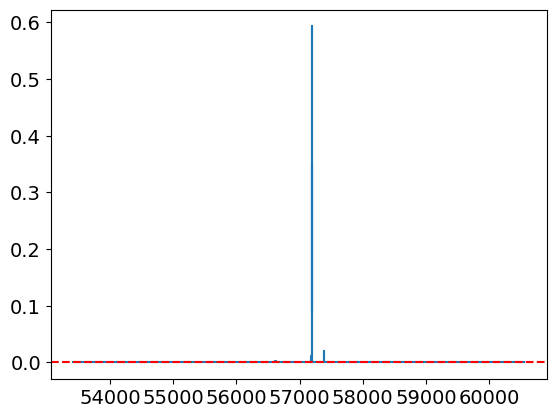

In [23]:
h = hists['V404Cyg']
get_weighted_flux(h)
hl.plot1d(h)
eta = 1e-6
bins = h.bins[0]
values = h.values
smoothing = 3
diffs = np.diff(bins)

baseline = np.average(values, weights=diffs)

print(baseline)
plt.axhline(baseline, c='r', ls='--')

In [24]:
values = list(mean_active_counts.values())
names = list(mean_active_counts.keys())
idx = np.argsort(list(mean_active_counts.values()))[::-1]

for i in idx[:10]:
    print(values[i], names[i])

0.2864709748195309 1A0535p262
0.10211933621712789 V404Cyg
0.09025251230224902 LSVp4417
0.07222880537383271 ScoX-1
0.05611151462080407 GX301-2
0.05250027972390849 XTEJ1752-223
0.05024795233566374 CygX-1
0.04617885943579768 V0332p53
0.03890988661098143 GX304-1
0.035711817112628684 VelaX-1


In [25]:
drop_name = []
for bins, values, name in zip(bins_dict[10], values_dict[10], name_disp):
    #os_bins = bins[np.where(values > 1e-6)]
    bins_in_time = (bins > 55694) & (bins < 59361)
    pos_bins = bins[(values > 1e-3) & bins_in_time]
    if len(pos_bins) > 1 :
        if pos_bins[-1] < 55694:
            print(f'{name} No positive bins in data: Latest Bin {pos_bins[-1]}')
            drop_name.append(name.replace("'",""))
        
    else:
        print(f'{name} No pos bins')
        drop_name.append(name.replace("'",""))

XTE_J0055_dash_727 No pos bins
RX_J0052_dot_1_dash_7319 No pos bins
RX_J0101_dot_8_dash_7223 No pos bins
LSI_plus_61_303 No pos bins
GRO_J0422_plus_32 No pos bins
SWIFT_J0513_dot_4_dash_6547 No pos bins
4U_0513_dash_40 No pos bins
LMC_X_dash_2 No pos bins
RX_J0531_dot_2_dash_6607 No pos bins
XMMU_J054134_dot_7_dash_682550 No pos bins
IGR_J06074_plus_2205 No pos bins
1A_0620_dash_00 No pos bins
MXB_0656_dash_072 No pos bins
EXO_0748_dash_676 No pos bins
SAX_J0835_dot_9_plus_5118 No pos bins
4U_0836_dash_42 No pos bins
IGR_J08408_dash_4503 No pos bins
XTE_J0929_dash_314 No pos bins
GRS_1009_dash_45 No pos bins
0FGL_J1018_dot_2_dash_5858 No pos bins
1E_1048_dot_1_dash_5937 No pos bins
XTE_J1118_plus_480 No pos bins
1A_1118_dash_61 No pos bins
IGR_J11215_dash_5952 No pos bins
Nova_Mus_1991 No pos bins
IGR_J11305_dash_6256 No pos bins
4U_1210_dash_64 No pos bins
H_1254_dash_690 No pos bins
SWIFT_J1357_dot_2_dash_0933 No pos bins
MAXI_J1409_dash_619 No pos bins
Swift_J1448_dot_4_dash_5945 No

In [26]:
np.where(np.array(name_disp) == 'EXO_0748_dash_676')

(array([27]),)

In [27]:
stacking_fails = [
    'XMMU_J054134_dot_7_dash_682550',
    'MXB_0656_dash_072',
    'EXO_0748_dash_676',
    '1A_1118_dash_61',
    'MAXI_J1409_dash_619',
    'GRO_J1655_dash_40',
    'MAXI_J1659_dash_152',
    'XTE_J1701_dash_462',
    'IGR_J17473_dash_2721',
    'XTE_J1752_dash_223',
    'IGR_J17586_dash_2129',
    'XTE_J1817_dash_330',
    'Ginga_1843_plus_00'
]


In [28]:
for src in stacking_fails:
    if src in drop_name:
        pass
    else:
        print(src)

In [29]:
for src in stacking_fails:
    print(sources[sources["name_disp"] == src].dec_deg.values)

[-68.4306]
[-7.21]
[-67.75]
[-61.917]
[-61.984]
[-39.8333]
[-15.258]
[-46.186]
[-27.344]
[-22.342]
[-21.389]
[-33.019]
[0.863]


In [30]:
mask2 = sources["name_disp"].isin(drop_name)
sum(mask2)

111

In [31]:
mask_comb = mask & ~mask2

In [32]:
print(sum(mask))
print(sum(mask2))
print(sum(mask_comb))

91
111
75


In [33]:
len(sources)

254

In [34]:
for p in bins_dict.keys():
    sources[f'lc_bins_{p}'] = bins_dict[p]
    sources[f'lc_values_{p}'] = values_dict[p]

In [35]:
sources['mean_active_flux'] = mean_active_counts.values()

In [36]:
sources[sources.name_disp == '1A_0535_plus_262']

,name,name_disp,var,excess_var,mean_rate,dec_deg,ra_deg,lc_bins_10,lc_values_10,mean_active_flux
21,1A 0535+262,1A_0535_plus_262,35.644764,430.608072,0.001989,26.317,84.725,"[53414.0, 53415.0, 53498.5, 53508.5, 53512.5, ...","[0.0091122448591399, 0.0002446631299928361, 0....",0.286471


In [37]:
lc_sources = sources[mask_comb]

In [38]:
len(lc_sources.name_disp)
print(lc_sources.name_disp.values)

['IGR_J00370_plus_6122' '3A_0114_plus_650' '4U_0115_plus_634'
 'V0332_plus_53' 'LSV_plus_44_17' '1A_0535_plus_262' 'GS_0834_dash_430'
 'Vela_X_dash_1' 'GRO_J1008_dash_57' 'Cen_X_dash_3' 'IGR_J11435_dash_6109'
 'H_1145_dash_619' 'GX_301_dash_2' 'GX_304_dash_1' 'Ginga_1354_dash_645'
 'H_1417_dash_624' 'Cir_X_dash_1' '4U_1543_dash_62' 'H_1553_dash_542'
 'H_1608_dash_522' 'Sco_X_dash_1' '4U_1624_dash_490'
 'AX_J1631_dot_9_dash_4752' '4U_1630_dash_472' 'IGR_J16393_dash_4643'
 '4U_1636_dash_536' 'Her_X_dash_1' 'EXO_1657_dash_419'
 'XTE_J1701_dash_407' 'GX_339_dash_4' '4U_1700_dash_377' '4U_1700_plus_24'
 'IGR_J17091_dash_3624' 'IGR_J17252_dash_3616' 'GX_354_dash_0'
 'GX_1_plus_4' 'Rapid_Burster' 'XB_1732_dash_304' 'SLX_1735_dash_269'
 'XTE_J1739_dash_285' '1E_1740_dot_7_dash_2942' 'AX_J1744_dot_8_dash_2921'
 'Swift_J1745_dot_1_dash_2624' 'IGR_J17464_dash_3213' 'EXO_1745_dash_248'
 'H_1745_dash_203' 'AX_J1749_dot_1_dash_2639' 'SAX_J1750_dot_8_dash_2900'
 'IGR_J17544_dash_2619' 'GX_5_dash_1' '

In [39]:
for n in sorted(lc_sources.name_disp):
    s = lc_sources[lc_sources.name_disp == n]
    bins = s.lc_bins_10.values[0]
    if len(bins) < 3:
        print(n, len(bins))

In [40]:
len(lc_sources.index)

75

In [41]:
lc_sources.to_hdf('lc_sources_reselected_IC86.hdf', 'xrb')

/tmp/ipykernel_54289/3683467997.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['name', 'name_disp', 'lc_bins_10', 'lc_values_10'], dtype='object')]

  lc_sources.to_hdf('lc_sources_reselected_IC86.hdf', 'xrb')


In [42]:
s = pd.read_hdf('lc_sources_reselected_IC86.hdf')

In [43]:
#lc_bins = sources[sources.name == 'X Per'].lc_bins_100
# lc_values= sources[sources.name == 'X Per'].lc_values_100

In [44]:
s[s.name_disp == '3A_0114_plus_650']

,name,name_disp,var,excess_var,mean_rate,dec_deg,ra_deg,lc_bins_10,lc_values_10,mean_active_flux
8,3A 0114+650,3A_0114_plus_650,8.783161,13.494262,0.001704,65.2916,19.5112,"[53416.0, 53416.5, 53417.5, 53435.0, 53449.0, ...","[0.000540445814760569, 0.006776905585103788, 0...",0.00148
